# 京东JData算法大赛(2)-数据分析

In [1]:
# 导入相关包
%matplotlib inline
# 绘图包
import matplotlib
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

In [2]:
# 定义文件名
root = '/Users/pengchengliu/Documents/GitHub/JDATA2017/'
ACTION_201602_FILE = root+"data/JData_Action_201602.csv"
ACTION_201603_FILE = root+"data/JData_Action_201603.csv"
ACTION_201604_FILE = root+"data/JData_Action_201604.csv"
COMMENT_FILE = root+"data/JData_Comment.csv"
PRODUCT_FILE = root+"/data/JData_Product.csv"
USER_FILE = root+"data/JData_User.csv"
NEW_USER_FILE = root+"data/JData_User_New.csv"
USER_TABLE_FILE = root+"data/user_table.csv"
ITEM_TABLE_FILE = root+"data/item_table.csv"

### Analysis of Purchase per weekday

In [3]:
# extract purchase data (type=4)
def get_from_action_data(fname, chunk_size=100000):
    reader = pd.read_csv(fname, header=0, iterator=True)
    chunks = []
    loop = True
    while loop:
        try:
            chunk = reader.get_chunk(chunk_size)[
                ["user_id", "sku_id", "type", "time"]]
            chunks.append(chunk)
        except StopIteration:
            loop = False
            print("Iteration is stopped")

    df_ac = pd.concat(chunks, ignore_index=True)
    # type=4 as purchase
    df_ac = df_ac[df_ac['type'] == 4]

    return df_ac[["user_id", "sku_id", "time"]]

In [17]:
df_ac = []
df_ac.append(get_from_action_data(fname=ACTION_201602_FILE))
df_ac.append(get_from_action_data(fname=ACTION_201603_FILE))
df_ac.append(get_from_action_data(fname=ACTION_201604_FILE))
df_ac = pd.concat(df_ac, ignore_index=True)

Iteration is stopped
Iteration is stopped
Iteration is stopped


In [18]:
print(df_ac.dtypes)

user_id    float64
sku_id       int64
time        object
dtype: object


In [19]:
# cast var time to datetime type
df_ac['time'] = pd.to_datetime(df_ac['time'])

# use lambda func 
# convert time to weekdays, Monday: 1, ..., Sunday: 7
df_ac['time'] = df_ac['time'].apply(lambda x: x.weekday() + 1)

In [20]:
# count of unique user that purchased per weekday
df_user = df_ac.groupby('time')['user_id'].nunique()
df_user = df_user.to_frame().reset_index()
df_user.columns = ['weekday', 'user_num']

In [21]:
# count of unique produt (sku_id) per weekday
df_item = df_ac.groupby('time')['sku_id'].nunique()
df_item = df_item.to_frame().reset_index()
df_item.columns = ['weekday', 'item_num']

In [22]:
# count of purchase item (sku_id*user_id) per weekday
df_ui = df_ac.groupby('time', as_index=False).size()
df_ui = df_ui.to_frame().reset_index()
df_ui.columns = ['weekday', 'user_item_num']

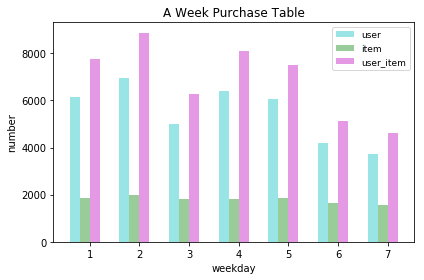

In [25]:
# Plot purchase frequency per weekday
# set bar width
bar_width = 0.2
# opacity, how transparent the chart is
opacity = 0.4

plt.bar(df_user['weekday'], df_user['user_num'], bar_width, 
        alpha=opacity, color='c', label='user')
plt.bar(df_item['weekday']+bar_width, df_item['item_num'], 
        bar_width, alpha=opacity, color='g', label='item')
plt.bar(df_ui['weekday']+bar_width*2, df_ui['user_item_num'], 
        bar_width, alpha=opacity, color='m', label='user_item')

plt.xlabel('weekday')
plt.ylabel('number')
plt.title('A Week Purchase Table')
plt.xticks(df_user['weekday'] + bar_width * 3 / 2., (1,2,3,4,5,6,7))
plt.tight_layout() 
plt.legend(prop={'size':9})

**Pattern Analysis**: The distribution of user purchase per weekday is relatively balanced, expect for that the number drops at weekday. This could be caused by the fact that users tend to go out to enjoy the weekend. Rather at workdays they use JD for shopping more frequently.

### Analysis of Purchase per calender day (type=4)

#### In Feb of 2016

In [26]:
#load behavior data in Feb
df_ac = get_from_action_data(fname=ACTION_201602_FILE)

# cast time to the type of datetime
# use lambda func to convert time to day
df_ac['time'] = pd.to_datetime(df_ac['time']).apply(lambda x: x.day)

Iteration is stopped


In [28]:
# count of unique user per day
df_user = df_ac.groupby('time')['user_id'].nunique()
df_user = df_user.to_frame().reset_index()
df_user.columns = ['day', 'user_num']

# count of unique product per day
df_item = df_ac.groupby('time')['sku_id'].nunique()
df_item = df_item.to_frame().reset_index()
df_item.columns = ['day', 'item_num']

# count of unique user-product per day
df_ui = df_ac.groupby('time', as_index=False).size()
df_ui = df_ui.to_frame().reset_index()
df_ui.columns = ['day', 'user_item_num']

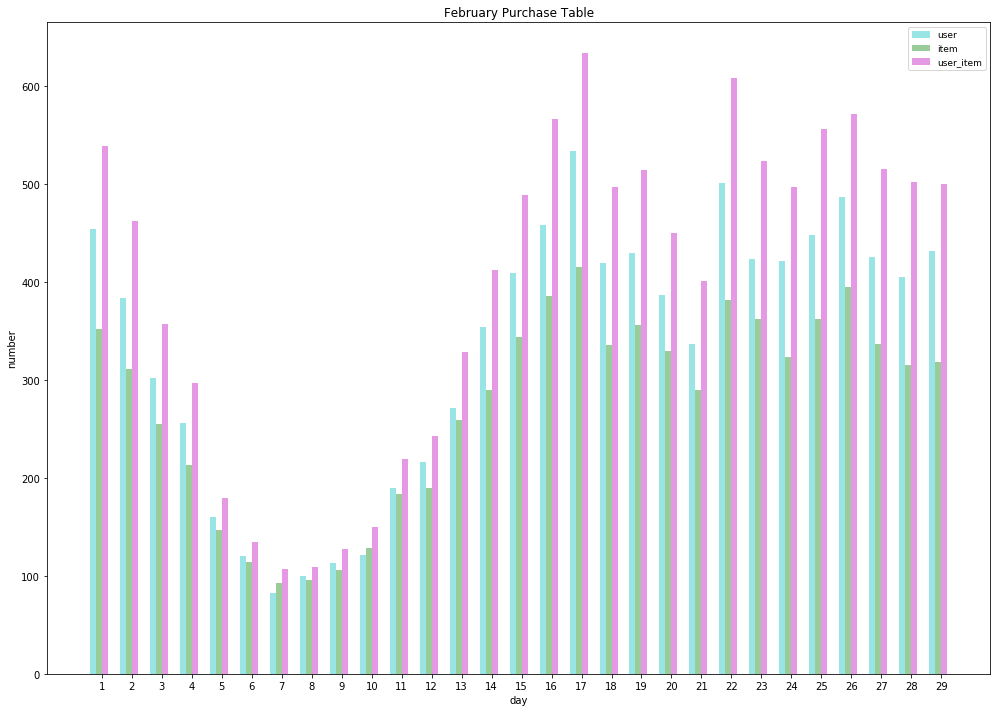

In [29]:
# visualise the distribution of purchasing (user-product) per day in Feb
# set bar width
bar_width = 0.2
# set opacity
opacity = 0.4
# day
day_range = range(1,len(df_user['day']) + 1, 1)
# set figure size
plt.figure(figsize=(14,10))

# bar of user
# parameters of plt.bar():
# data: x: df_user['day'], y: df_user['user_num']
# others: bar_width, alpha(opacity), color, label
plt.bar(df_user['day'], df_user['user_num'], bar_width, 
        alpha=opacity, color='c', label='user')
# bar of item
plt.bar(df_item['day']+bar_width, df_item['item_num'], 
        bar_width, alpha=opacity, color='g', label='item')
# bar of user_item
plt.bar(df_ui['day']+bar_width*2, df_ui['user_item_num'], 
        bar_width, alpha=opacity, color='m', label='user_item')

# use plt to draw a bar chart with multiple types of bars
# 1.plt.figure(figsize=(14,10))
# 2.plt.bar(x, y, bar_width, alpha(opacity), color, label)
# 3.plt.xlabel('day')
# 4.plt.ylabel('label')
# 5.plt.title()
# 6.plt.xticks()
# 7.plt.tight_layout()
# 8.plt.legend(prop)
plt.xlabel('day')
plt.ylabel('number')
plt.title('February Purchase Table')
plt.xticks(df_user['day'] + bar_width * 3 / 2., day_range)
# plt.ylim(0, 80)
plt.tight_layout() 
plt.legend(prop={'size':9})

**分析**: 从上面可以发现,在2月6号到2月10号之间是我们的农历新年,快递在这几天不上班,因而购物数量相对较少,在我们实际分析时, 可以暂时将这部分数据作为异常数据不去考虑,不加入我们的训练样本中.

#### 查看特定用户对特定商品的活动轨迹

In [ ]:
def spec_ui_action_data(fname, user_id, item_id, chunk_size=100000):
    reader = pd.read_csv(fname, header=0, iterator=True)
    chunks = []
    loop = True
    while loop:
        try:
            chunk = reader.get_chunk(chunk_size)[
                ["user_id", "sku_id", "type", "time"]]
            chunks.append(chunk)
        except StopIteration:
            loop = False
            print("Iteration is stopped")

    df_ac = pd.concat(chunks, ignore_index=True)
    df_ac = df_ac[(df_ac['user_id'] == user_id) & (df_ac['sku_id'] == item_id)]

    return df_ac

In [8]:
def explore_user_item_via_time():
    user_id = 62969
    item_id = 62655
    df_ac = []
    df_ac.append(spec_ui_action_data(ACTION_201602_FILE, user_id, item_id))
    df_ac.append(spec_ui_action_data(ACTION_201603_FILE, user_id, item_id))
    df_ac.append(spec_ui_action_data(
        ACTION_201603_EXTRA_FILE, user_id, item_id))
    df_ac.append(spec_ui_action_data(ACTION_201604_FILE, user_id, item_id))

    df_ac = pd.concat(df_ac, ignore_index=False)
    print(df_ac.sort_values(by='time'))

In [9]:
explore_user_item_via_time()

Iteration is stopped
Iteration is stopped
Iteration is stopped
Iteration is stopped
       user_id  sku_id  type                 time
12296    62969   62655     1  2016-02-01 11:00:05
12307    62969   62655     1  2016-02-01 11:00:05
12300    62969   62655     2  2016-02-01 11:00:18
12285    62969   62655     1  2016-02-01 11:00:49
12305    62969   62655     1  2016-02-01 11:00:49
12302    62969   62655     2  2016-02-01 11:02:16
12294    62969   62655     1  2016-02-01 11:02:17
12304    62969   62655     1  2016-02-01 11:02:17
12297    62969   62655     1  2016-02-01 11:03:47
12306    62969   62655     1  2016-02-01 11:03:47
12303    62969   62655     4  2016-02-01 11:04:00


> 预测数据部分: 2016-04-16到2016-04-20用户是否下单P中的商品，每个用户只会下单一个商品；

  由于我们需要预测16-20号五天用户的购买情况,那我们不妨分析下用户以5天为单位(周期为5)购买情况.